### Global Power Plant Database
`Project Description`:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

`Key attributes of the database`:
The database includes the following indicators:
    
1.  `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2.  `country_long` (text): longer form of the country designation
3.  `name` (text): name or title of the power plant, generally in Romanized form
4.  `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5.  `capacity_mw` (number): electrical generating capacity in megawatts
6.  `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7.  `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8.  `primary_fuel` (text): energy source used in primary electricity generation or export
9.  `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12. `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
33. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
34. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
35. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
36. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
# importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating a data frame with the given data set
df = pd.read_csv(r"D:\DataSets\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

`Note`:
1.  `other_fuel2`,`other_fuel3`, `estimated_generation_gwh`,`wepp_id` are empty. They doesn't serve any purpose in the analysis.

In [5]:
# removing the redundant columns and updating the DataFrame
df.drop(columns=["country","country_long",'url','year_of_capacity_data','gppd_idnr','owner','other_fuel3','other_fuel2','estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [6]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Missing Values
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [11]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [13]:
df.isnull().sum().sort_values()

name                        0
source                      0
primary_fuel                0
geolocation_source          0
latitude                    0
capacity_mw                 0
longitude                   0
commissioning_year        380
generation_data_source    458
generation_gwh_2018       459
generation_gwh_2017       467
generation_gwh_2016       473
generation_gwh_2015       485
generation_gwh_2014       509
other_fuel1               709
generation_gwh_2019       907
generation_gwh_2013       907
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


`Note`:
1.  The maximum power generation capacity if 4760 MW.
2.  There are two different target features `capacity_mw` (Regression Target Feature) and `primary_fuel` (Classification model)

#### Visualization (Capacity) Regression Target Variable

In [21]:
# for maximum capacity powerplant
df.capacity_mw.max()

4760.0

In [22]:

df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [23]:
# for minimum capacity powerplant
df.capacity_mw.min()

0.0

In [24]:
df.loc[df.capacity_mw == 0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`Note`:
1.  VINDH_CHAL STPS has the largest power generation capacity.
2.  Tata BP - Electronics City Solar Panel Plant has the lower power generation capacity. But there is a catch here. Any Power plant after getting commisioned cannot result in 0 MW power generation. There must be an error.

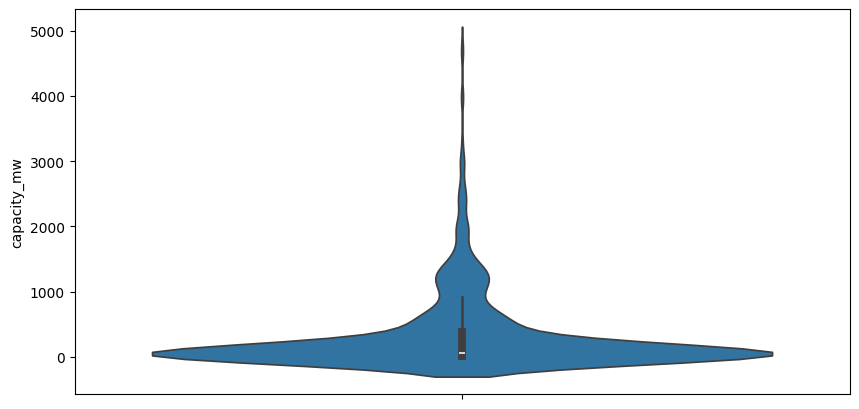

In [25]:
plt.figure(figsize = (10,5))
sns.violinplot(df.capacity_mw)
plt.show()

In [27]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T

capacity_mw,0.0,1.0,1.5,1.7,1.8,2.0,2.1,2.25,2.4,2.5,...,2630.0,2920.0,2980.0,3000.0,3300.0,3960.0,4000.0,4620.0,4760.0,All
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Coal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,1,258
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,251
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
Solar,1,17,0,0,1,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,127
Wind,0,1,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,123
All,1,18,3,2,1,6,2,1,1,1,...,1,1,1,2,1,1,1,1,1,907


In [55]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

In [56]:
# total Generation capacity of all Power plants
df['capacity_mw'].sum()

295884.946

In [60]:
# capacity in relation with the fuel source
df['capacity_mw'].groupby(df['primary_fuel']).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


`Note`:
1.  Maximum Power Generation from all power plants combined comes from `coal`

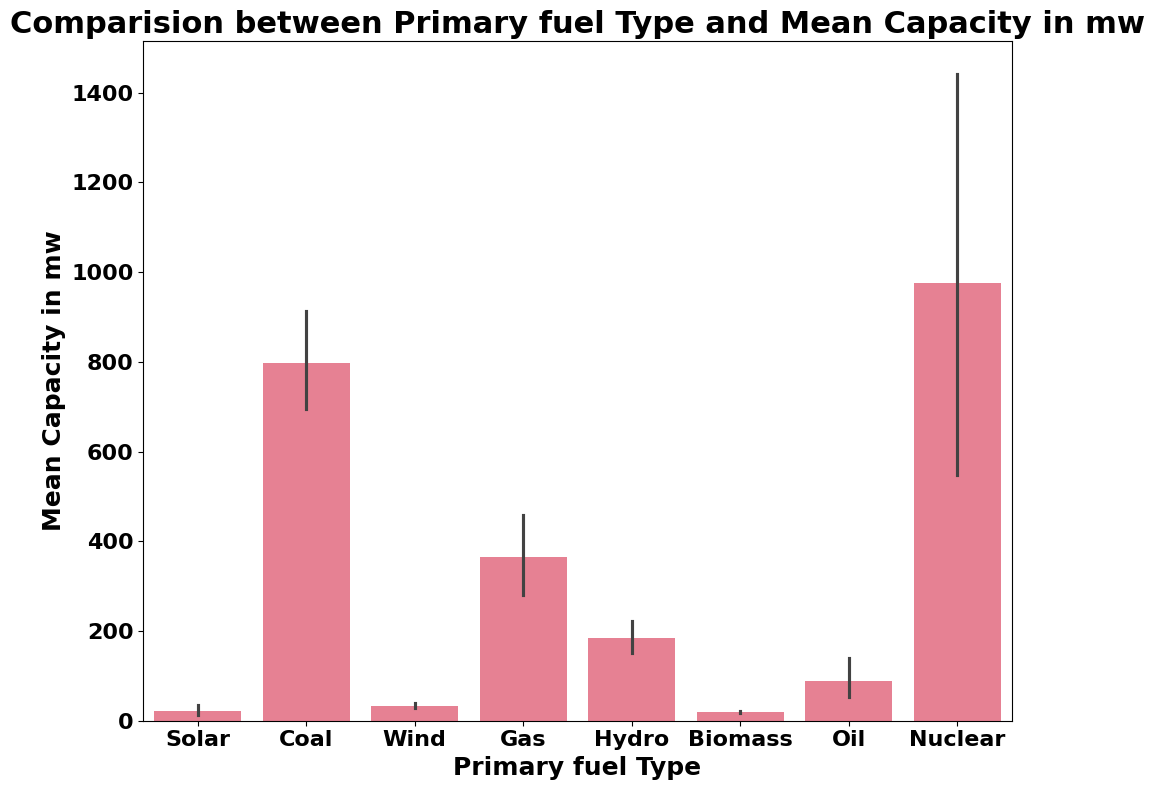

In [62]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

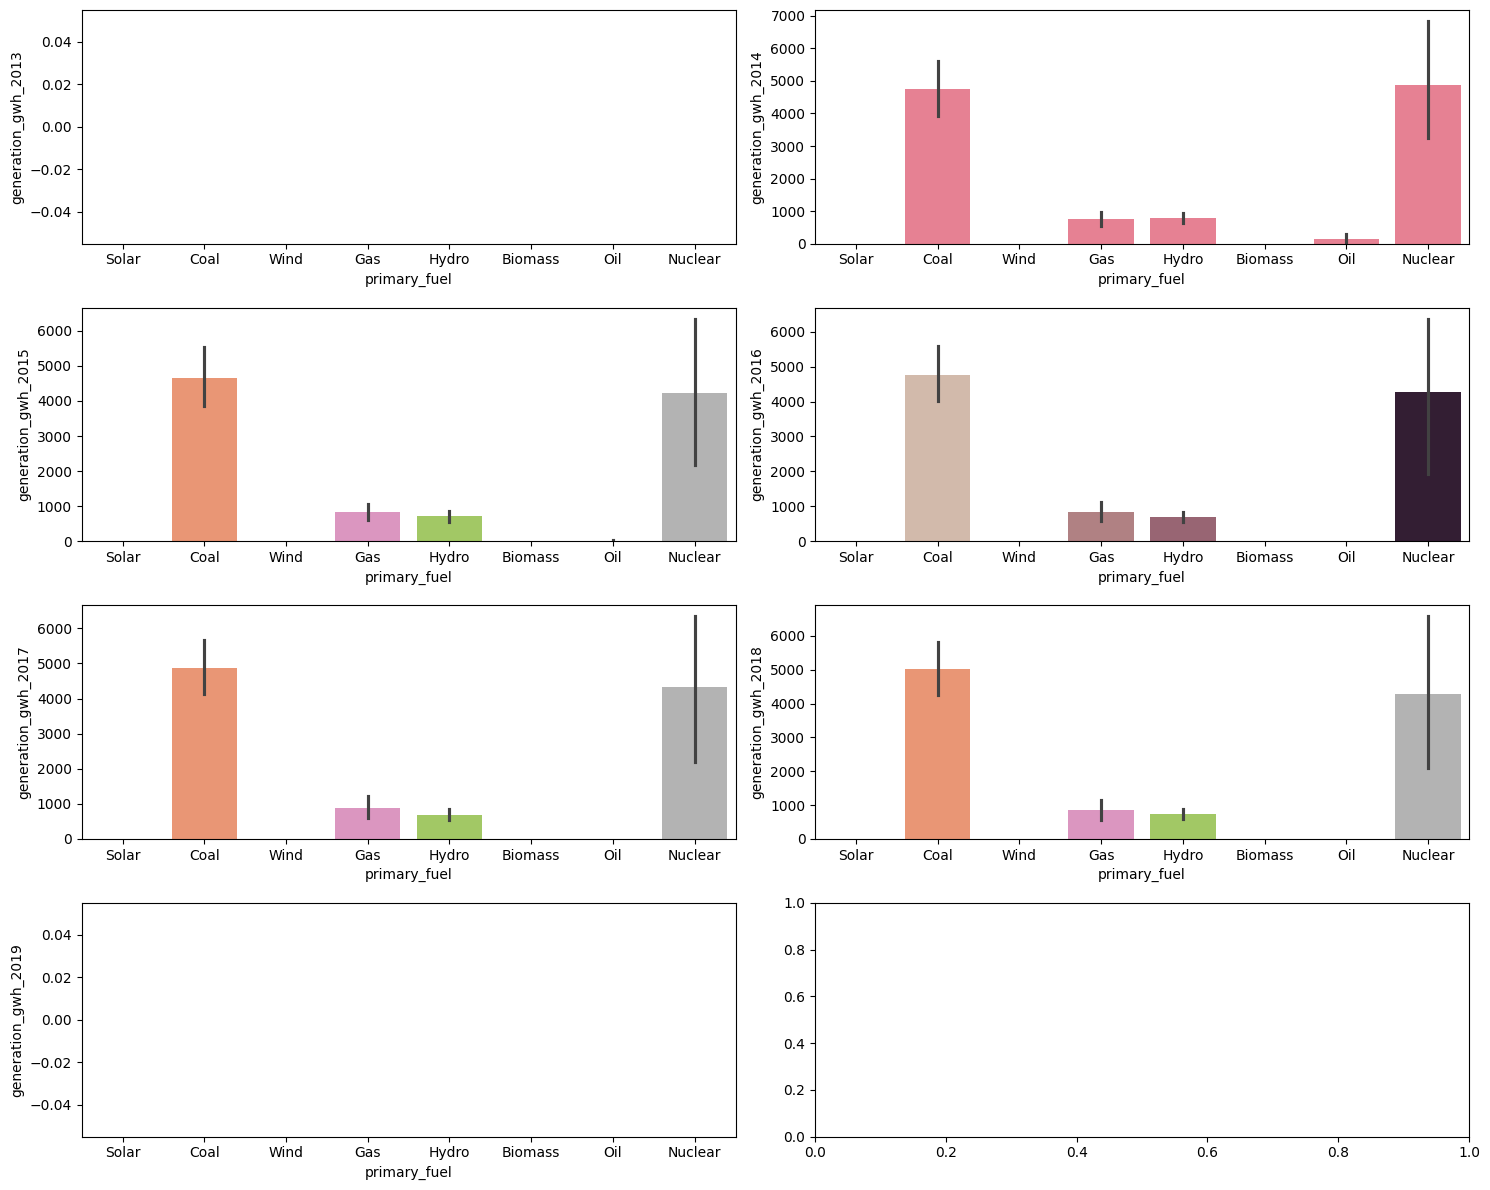

In [77]:
fig,axes=plt.subplots(4,2,figsize=(15,12))

# generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")

# generation growth in 2017
sns.barplot(x = 'primary_fuel' , y = 'generation_gwh_2017', ax = axes[2,0], data = df, palette = 'Set2' )

# generation growth in 2018
sns.barplot(x = 'primary_fuel' , y = 'generation_gwh_2018', ax = axes[2,1], data = df, palette = 'Set2' )

# generation growth in 2019
sns.barplot(x = 'primary_fuel' , y = 'generation_gwh_2019', ax = axes[3,0], data = df, palette = 'Set2' )
plt.show()

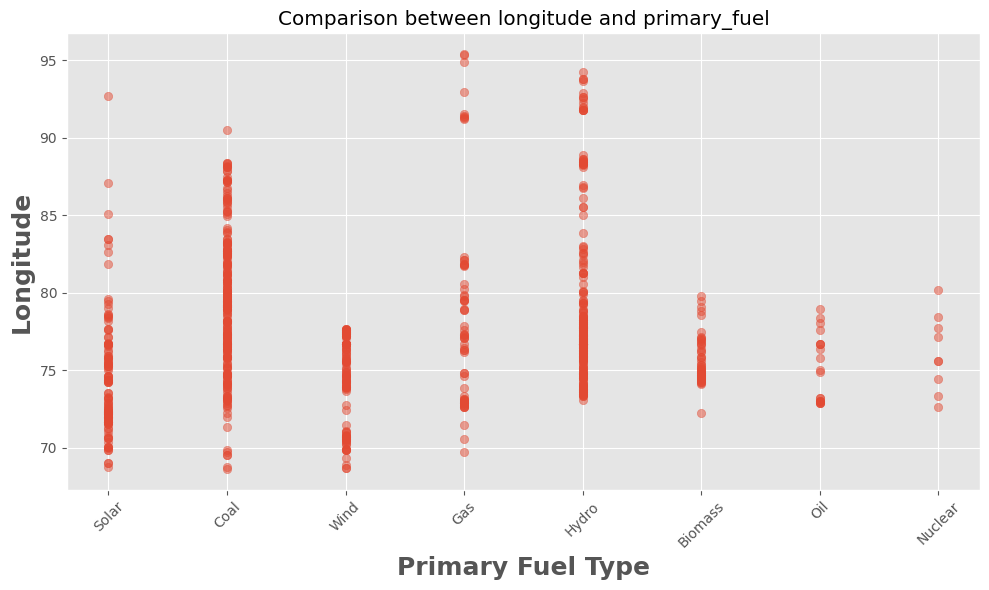

In [79]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between longitude and primary_fuel')
plt.scatter(df['primary_fuel'], df['longitude'], alpha=0.5)
plt.xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
plt.ylabel('Longitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


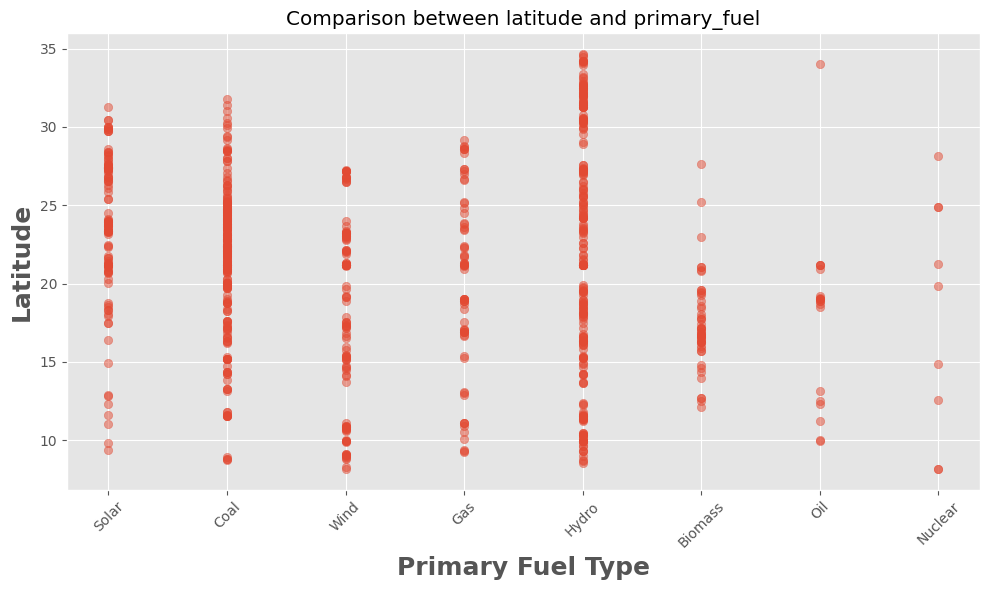

In [80]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and primary_fuel')
plt.scatter(df['primary_fuel'], df['latitude'], alpha=0.5)
plt.xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
plt.ylabel('Latitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


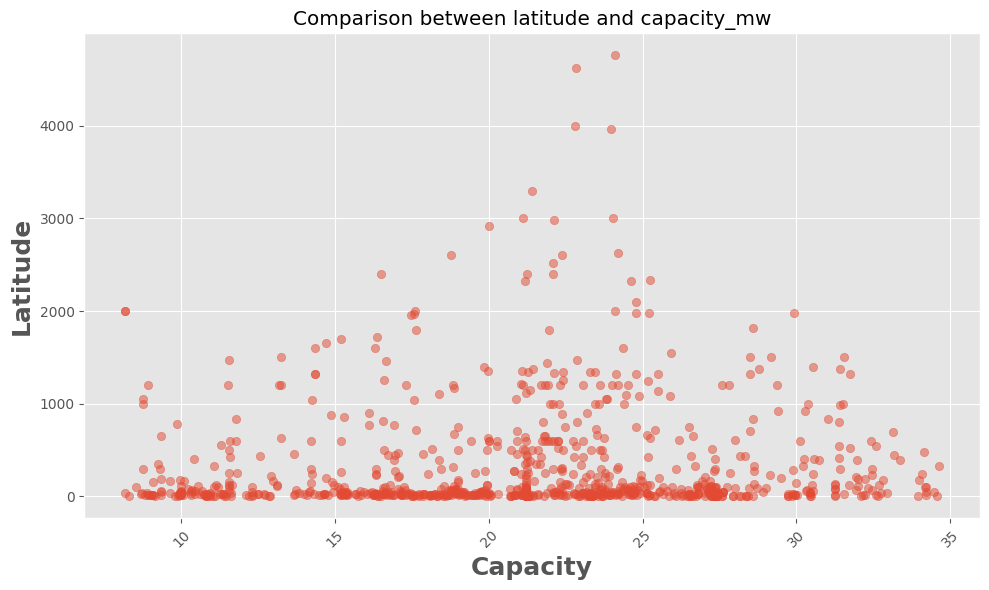

In [83]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and capacity_mw')
plt.scatter(df['latitude'], df['capacity_mw'], alpha=0.5)
plt.xlabel('Capacity', fontsize=18, fontweight='bold')
plt.ylabel('Latitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


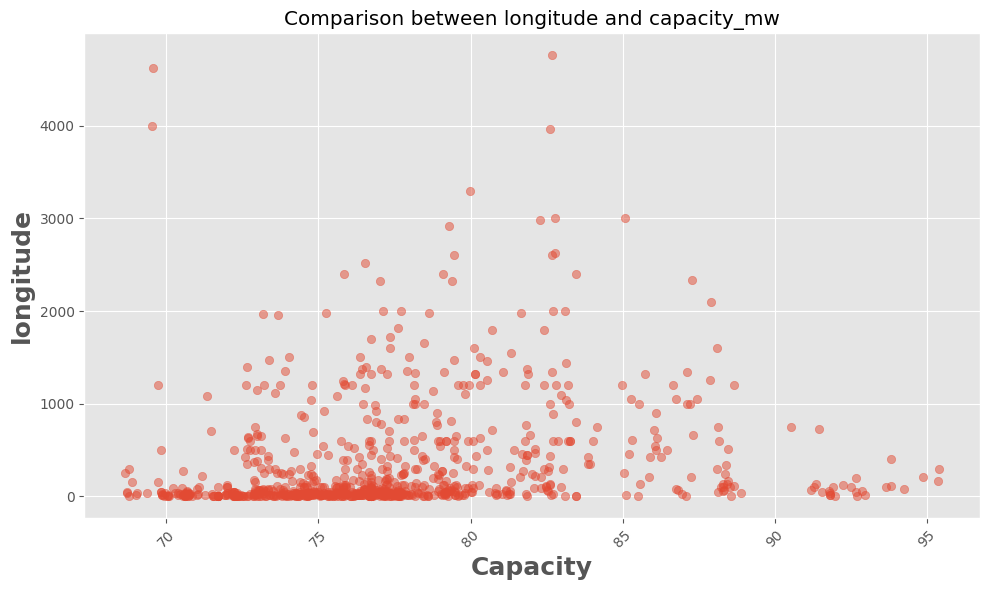

In [84]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between longitude and capacity_mw')
plt.scatter(df['longitude'], df['capacity_mw'], alpha=0.5)
plt.xlabel('Capacity', fontsize=18, fontweight='bold')
plt.ylabel('longitude', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [85]:
# commission age
df['Power_plant_age'] = 2020 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [86]:
# oldest powerplant
df.Power_plant_age.max()

93.0

In [87]:
# youngest powerplant
df.Power_plant_age.min()

2.0

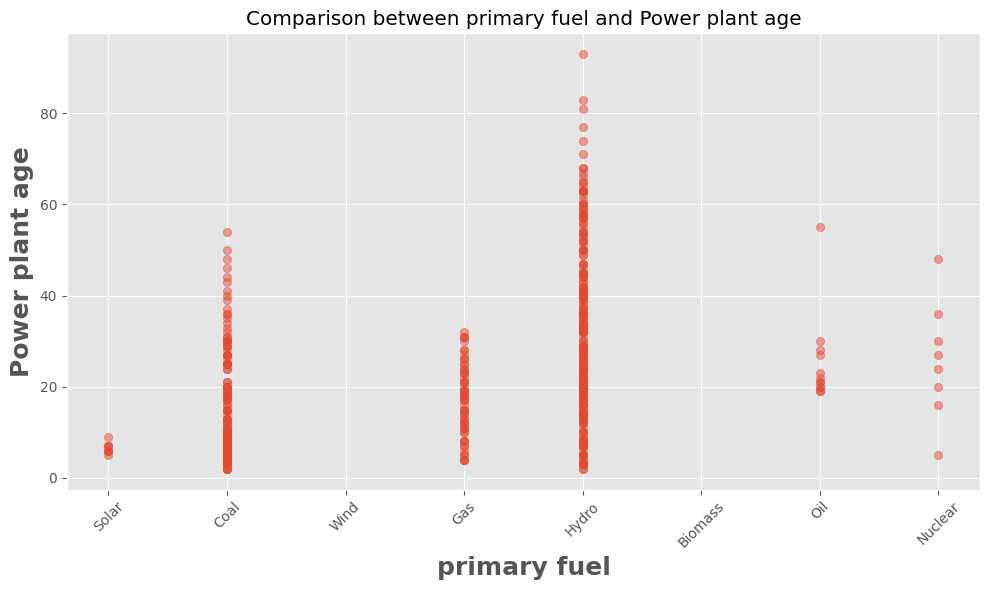

In [89]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between primary fuel and Power plant age')
plt.scatter(df['primary_fuel'], df['Power_plant_age'], alpha=0.5)
plt.xlabel('primary fuel', fontsize=18, fontweight='bold')
plt.ylabel('Power plant age', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


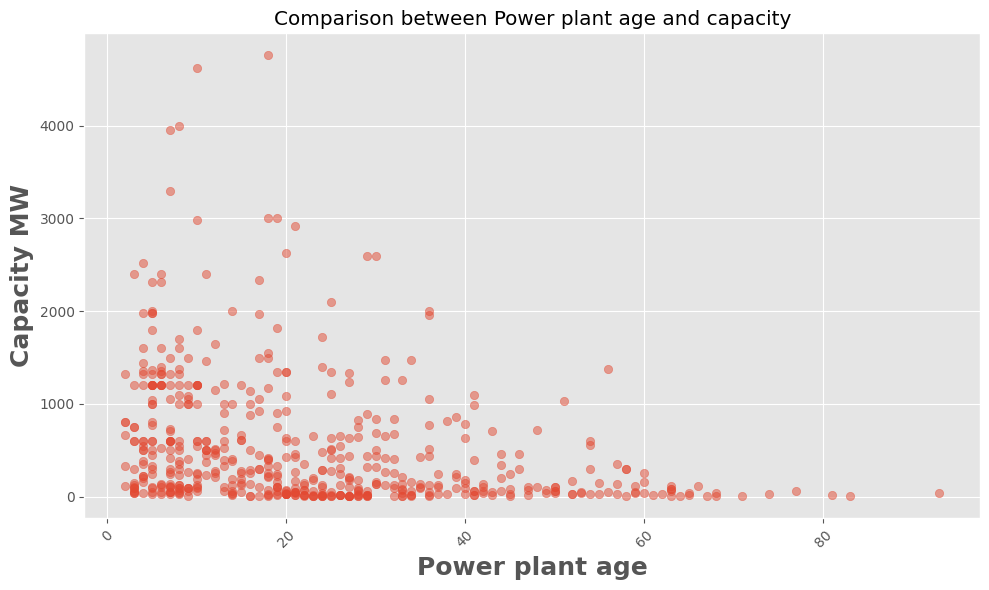

In [90]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between Power plant age and capacity')
plt.scatter(df['Power_plant_age'], df['capacity_mw'], alpha=0.5)
plt.xlabel('Power plant age', fontsize=18, fontweight='bold')
plt.ylabel('Capacity MW', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [91]:
# Segregation in Object_data type
obj_datatype = []
for i in df.dtypes.index:
  if df.dtypes[i] == 'object':
    obj_datatype.append(i)

num_datatype = []
for i in df.dtypes.index:
  if df.dtypes[i] == 'float64' or df.dtypes[i] == 'int64':
    num_datatype.append(i)

print(obj_datatype)
print(num_datatype)

['name', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source', 'generation_data_source']
['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


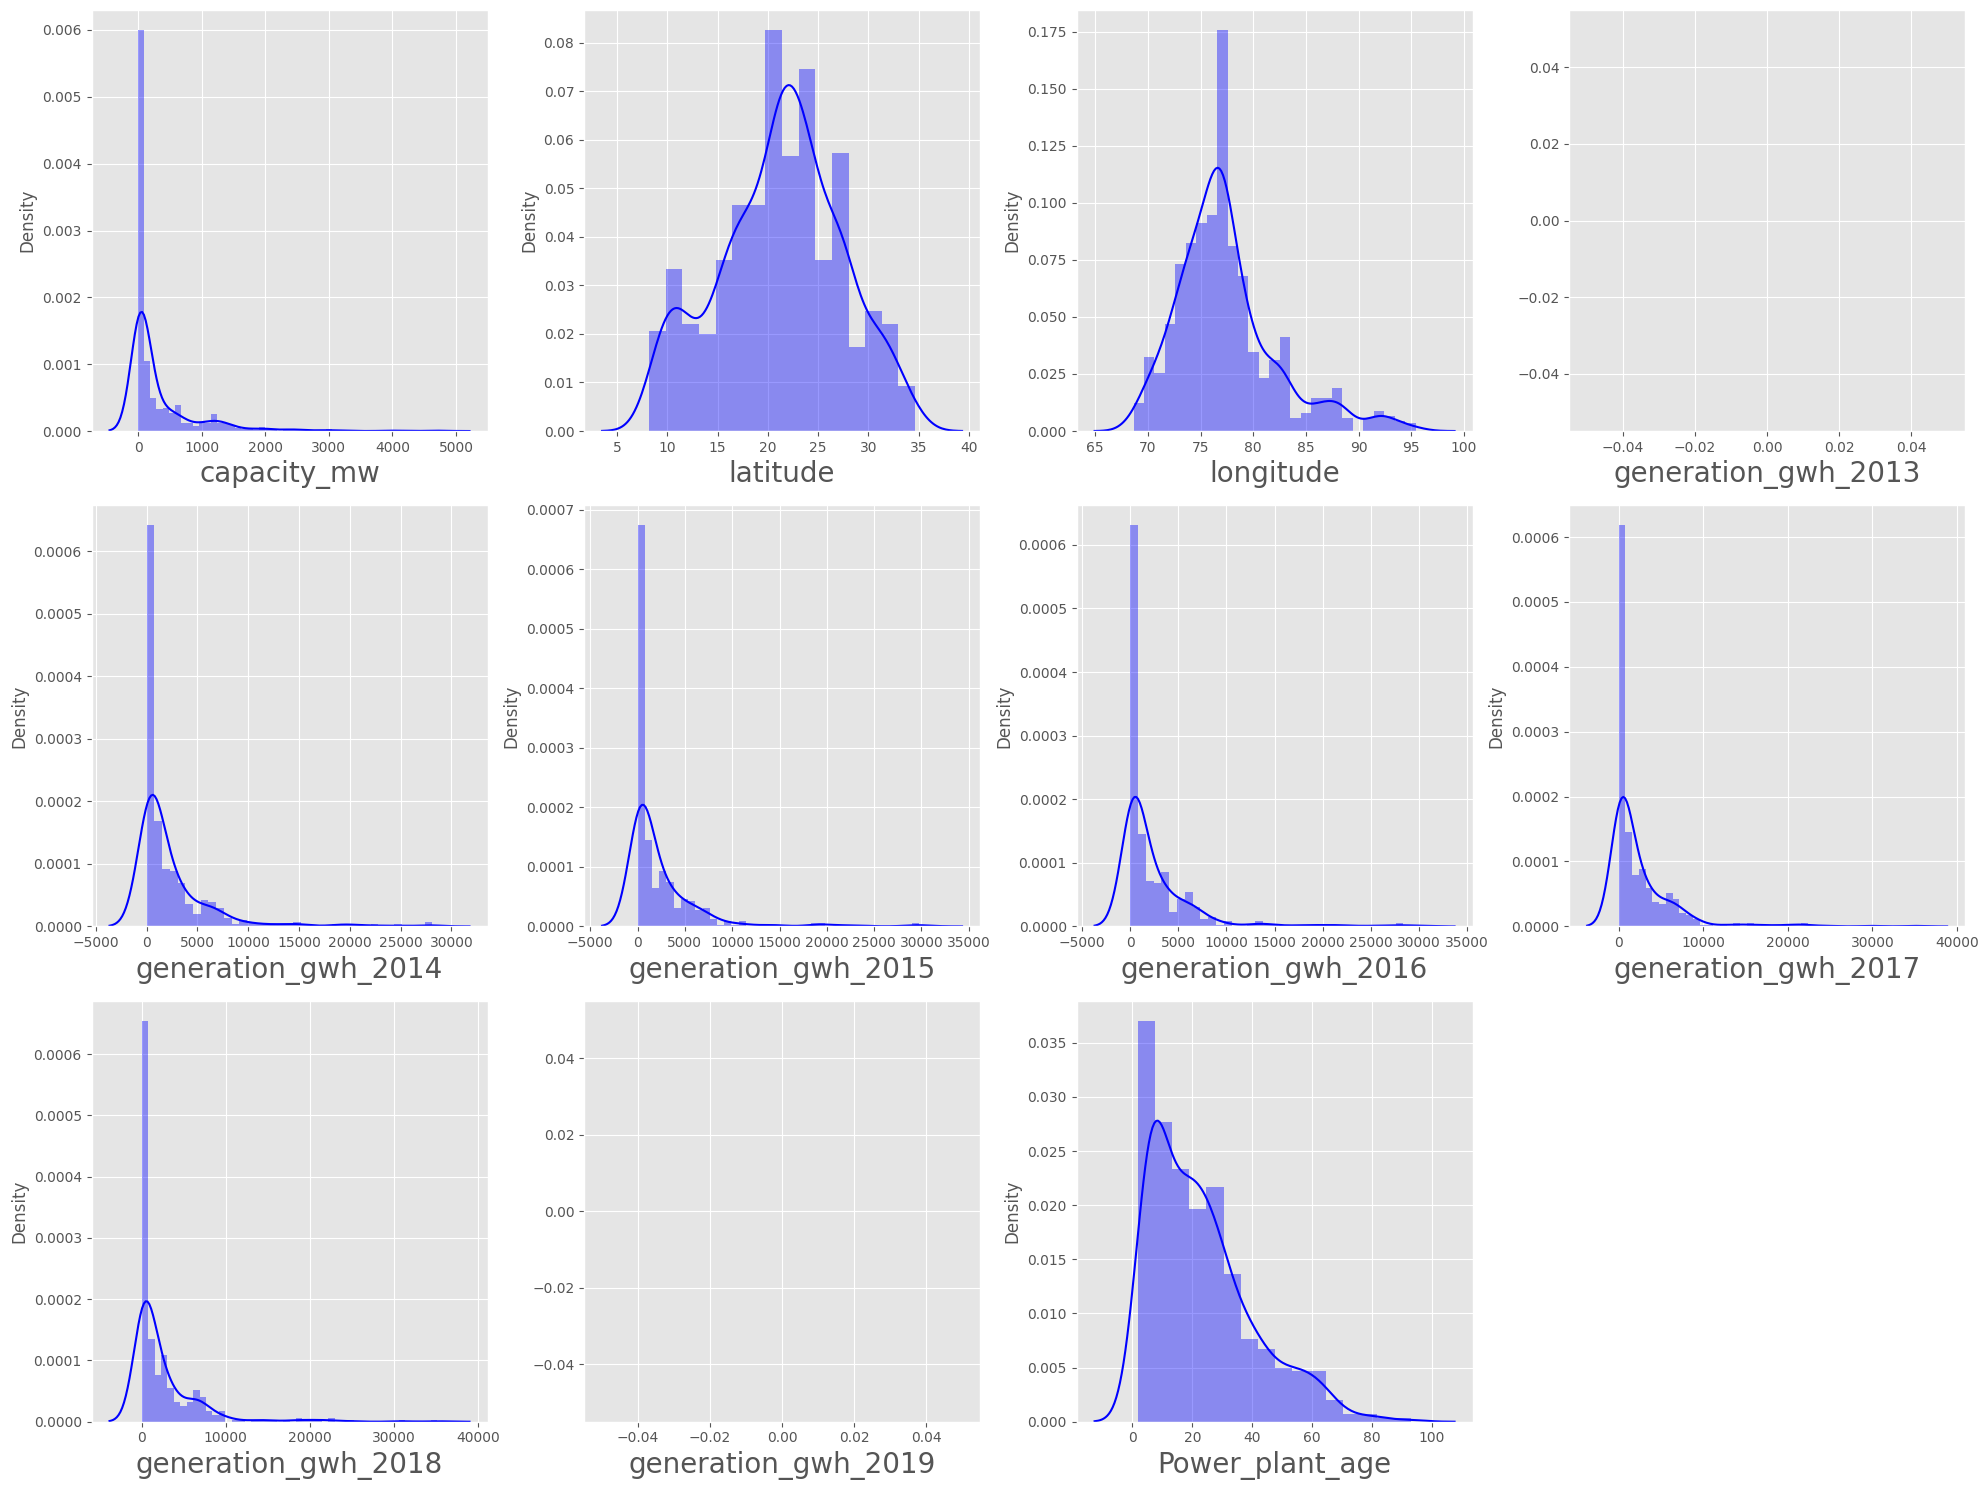

In [94]:
# for data distribution in each column
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in num_datatype:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.tight_layout()


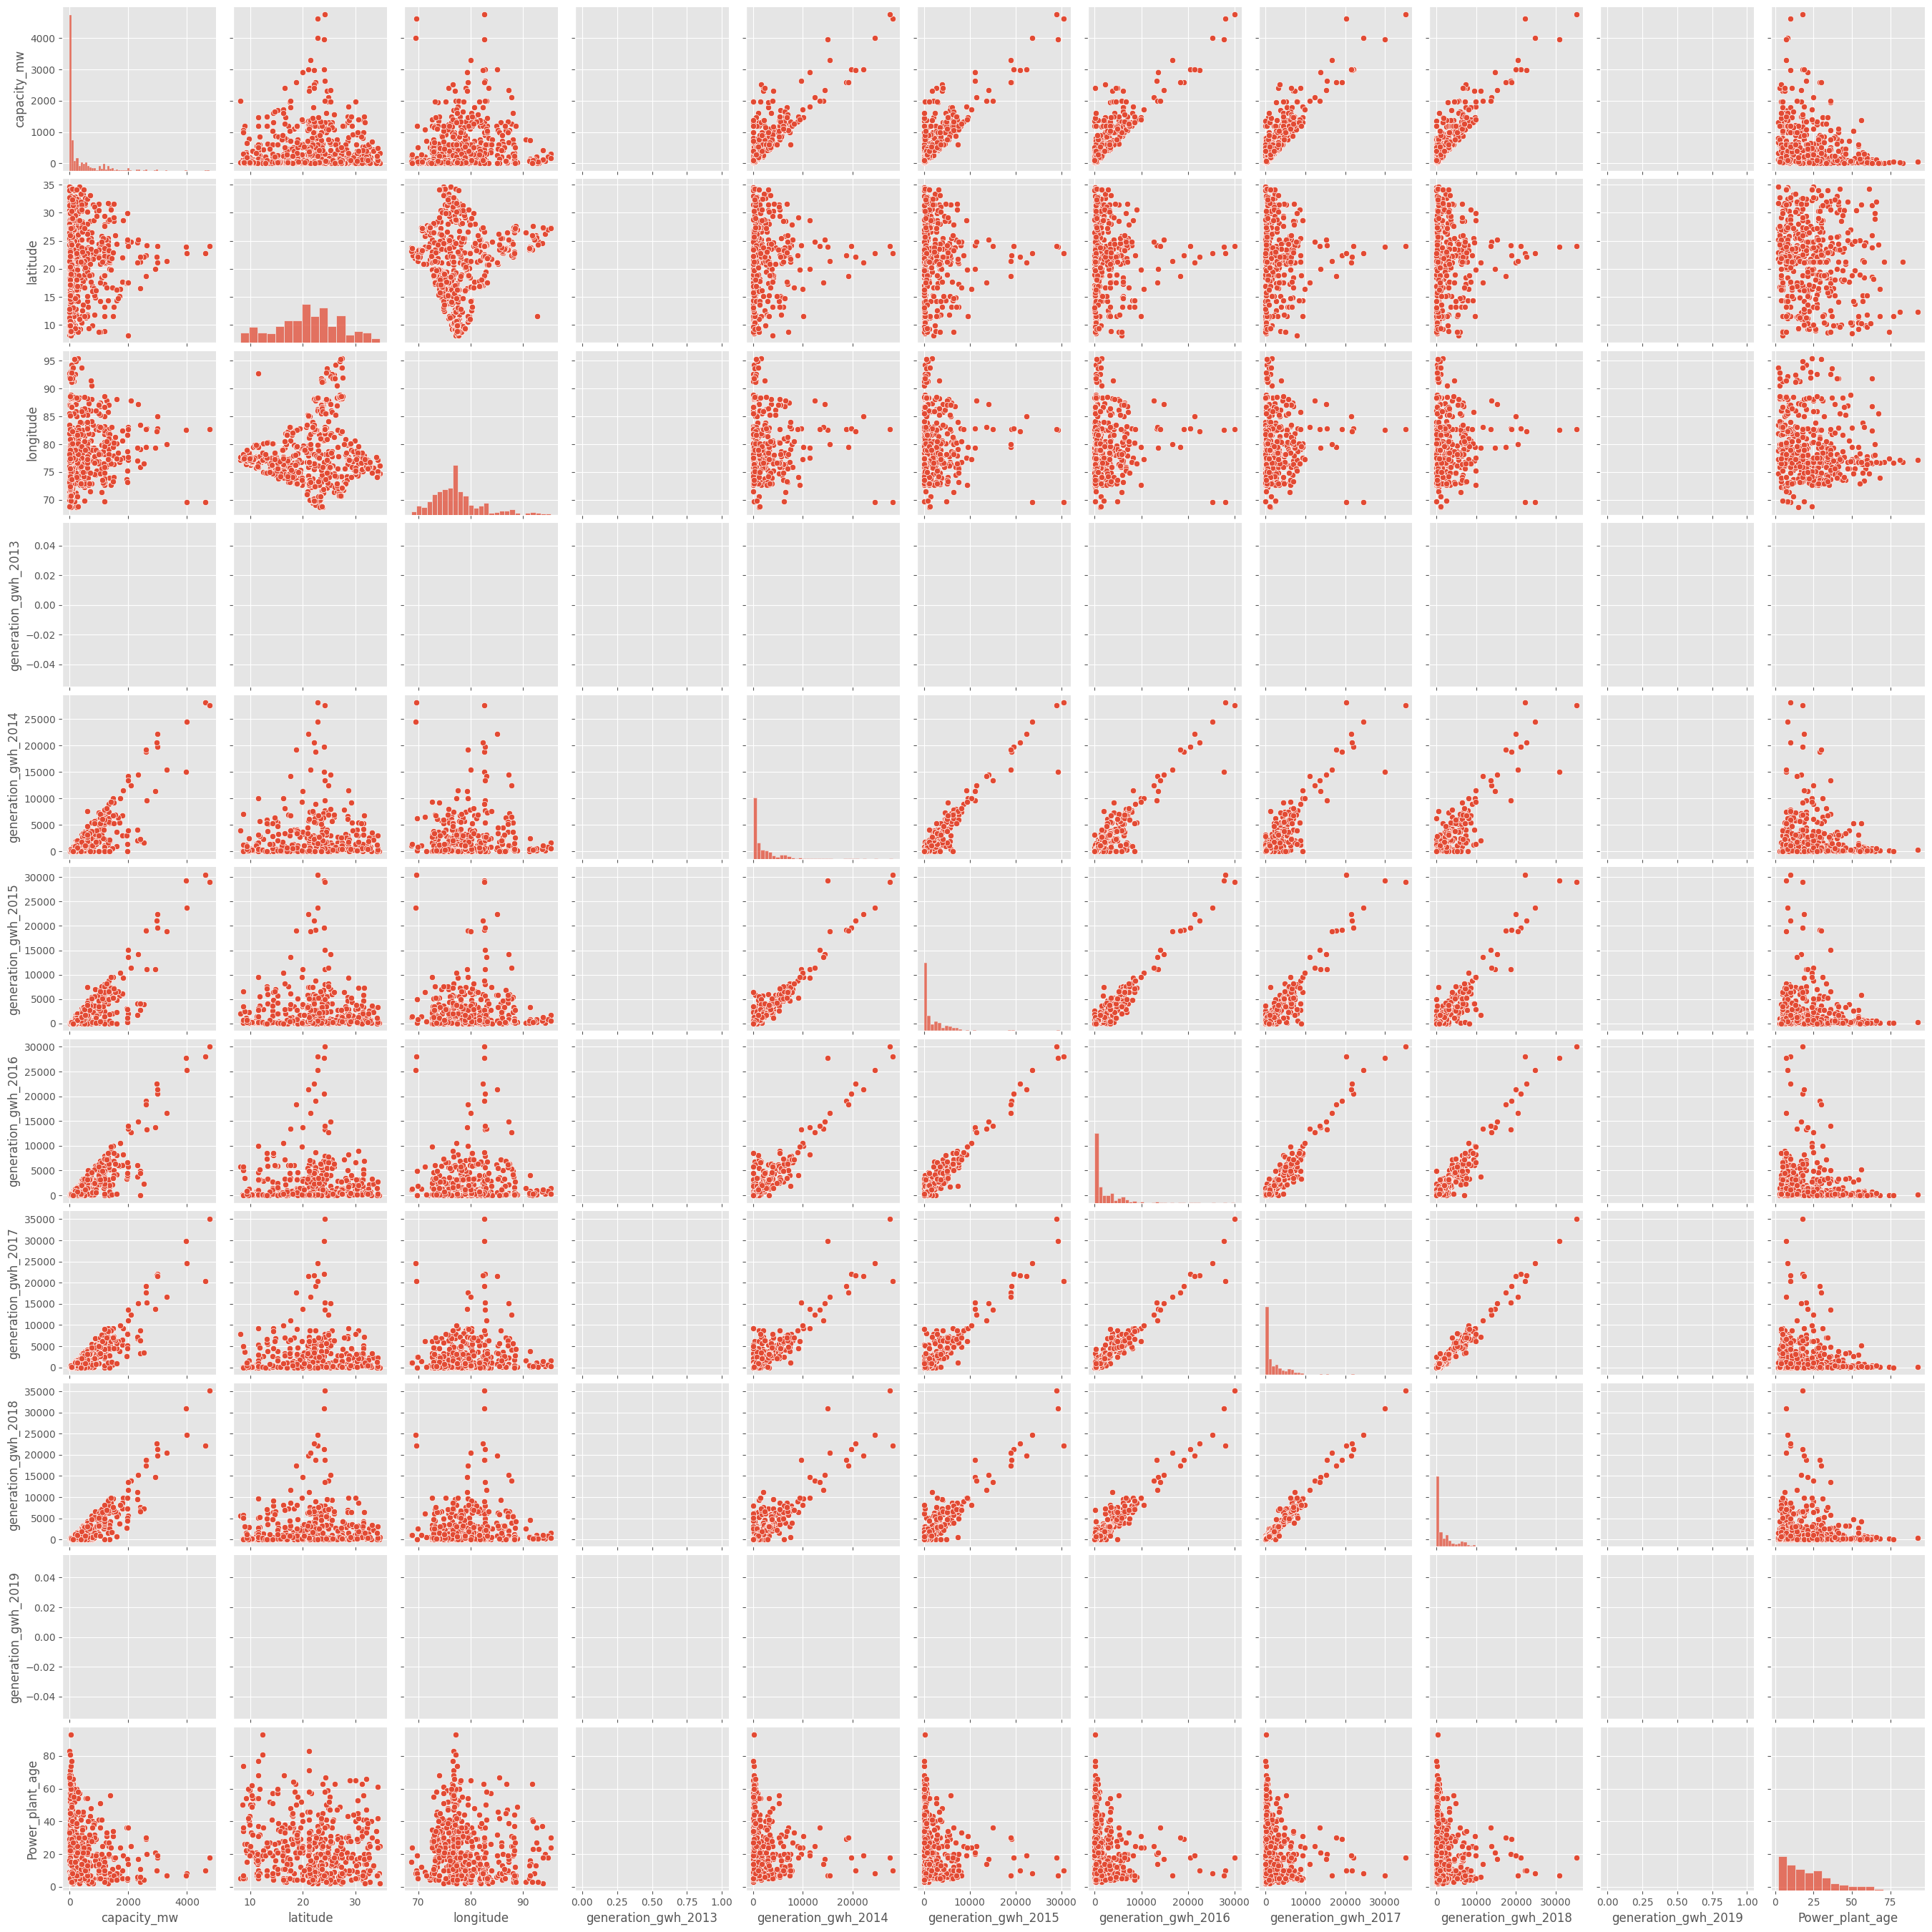

In [95]:
#Checking the pairwise relation between the features and label capacity in MW.
sns.pairplot(df)

`Note`:
1. Most of the feature shows a strong Linear Relationship and correlation

In [98]:
# encoding the categorical data
df.drop(['name','generation_data_source'], axis = 1, inplace = True)

In [99]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,16.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,4.0
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
l_column = ['primary_fuel','other_fuel1','source','geolocation_source']

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in l_column:
  df[i] = le.fit_transform(df[i])

In [103]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,16.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,4.0
903,3.0,12.8932,78.1654,6,3,77,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,3,59,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Remove of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [120]:
df2=df.copy
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [121]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


<Axes: >

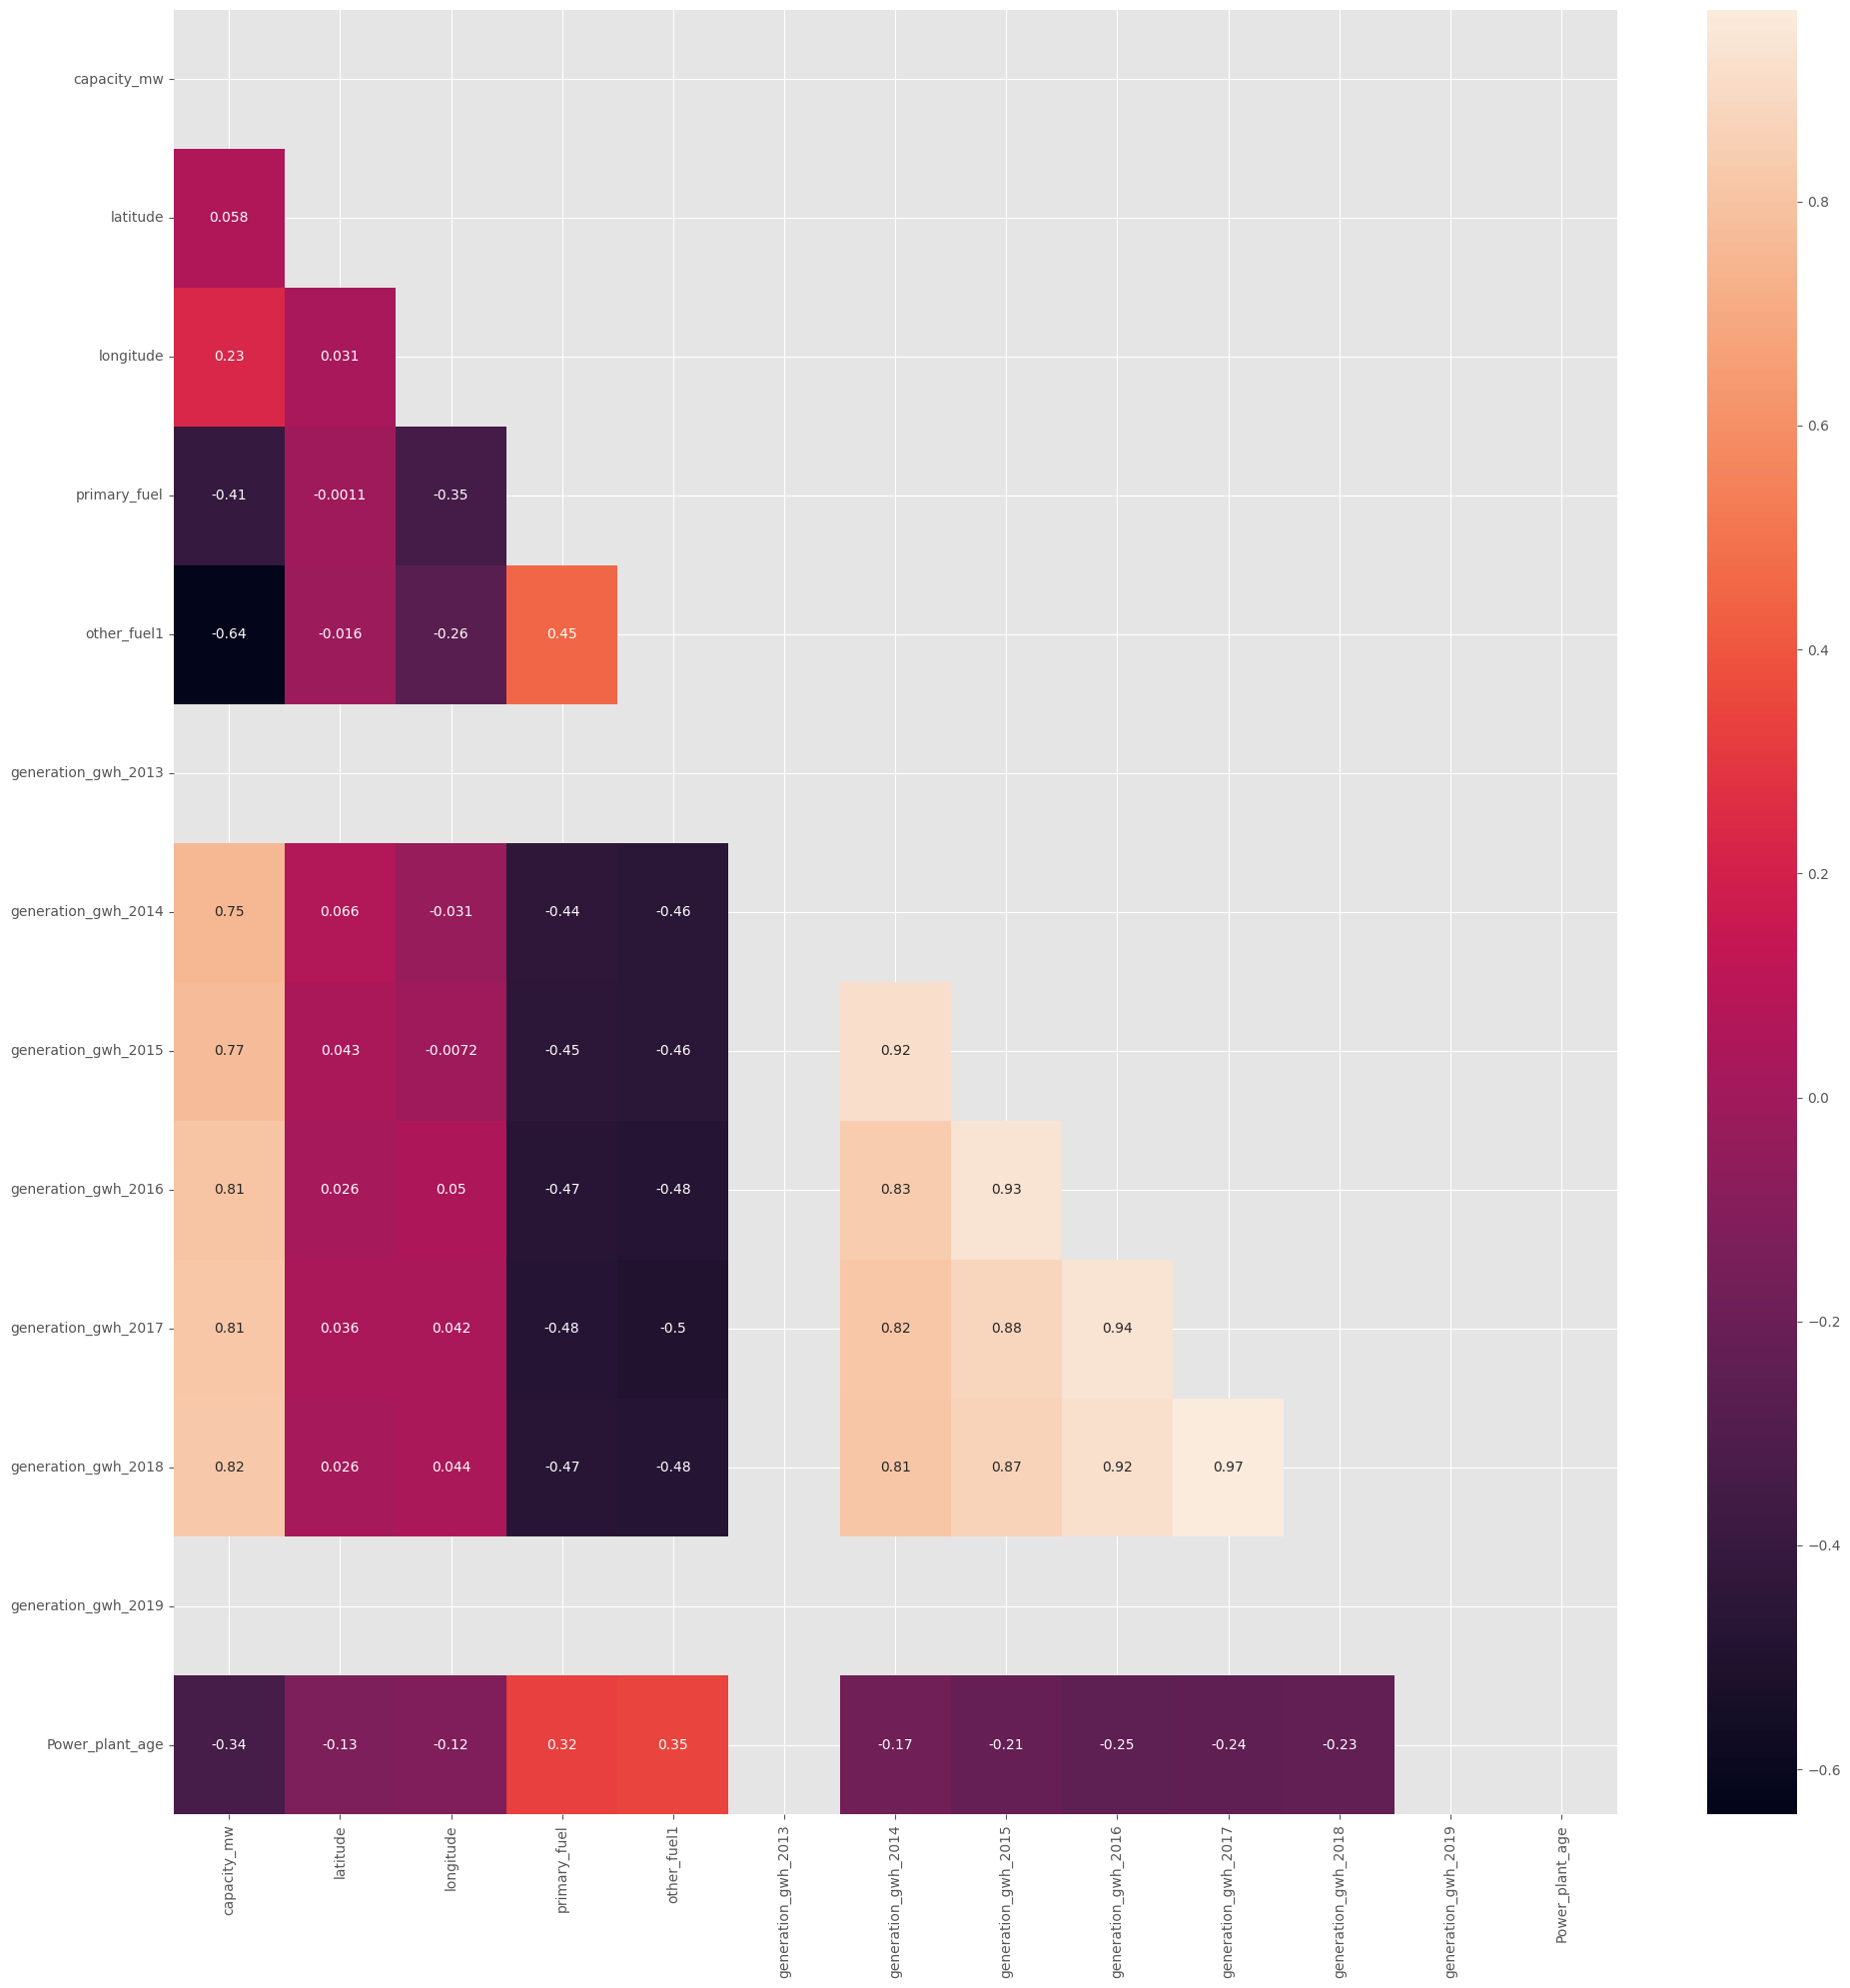

In [122]:
# correlation Matrix
plt.figure(figsize = (20,20))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot= True, mask = matrix)

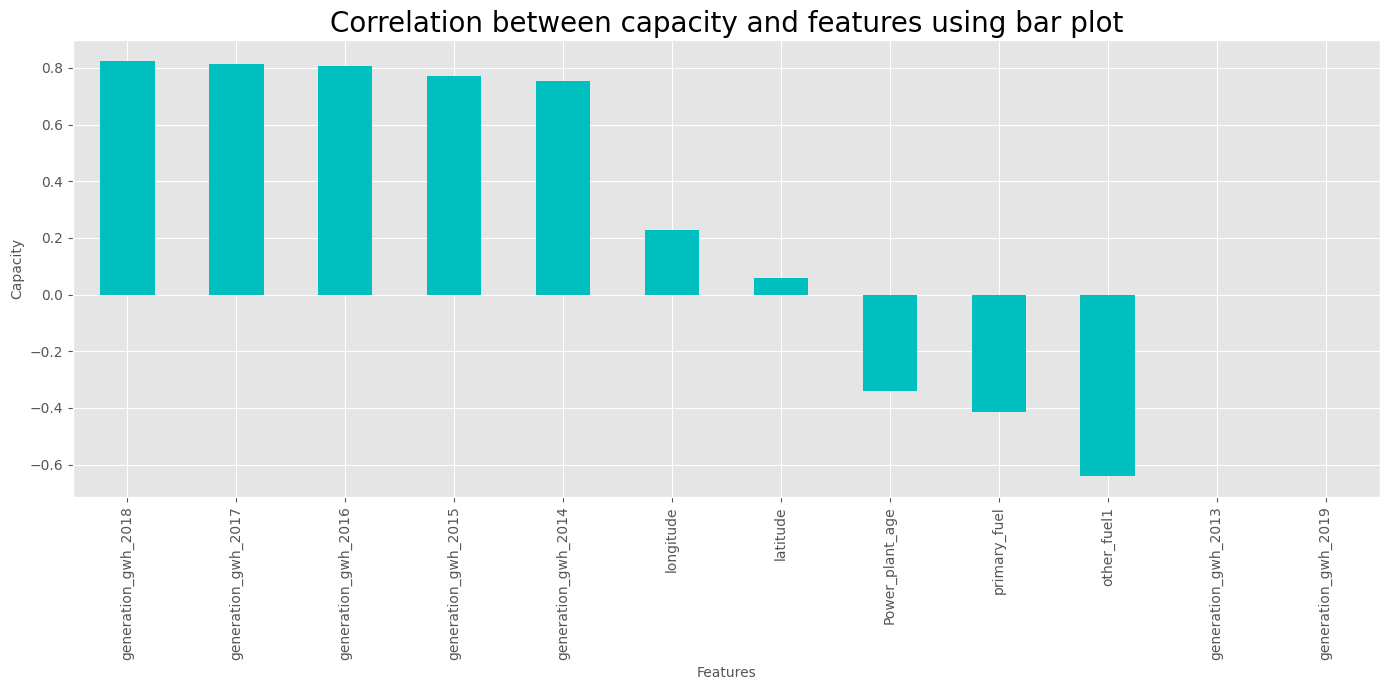

In [124]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

In [125]:
# skewness
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
generation_gwh_2019         NaN
Power_plant_age        1.030123
dtype: float64

In [128]:
# Log transform to fix skewness
for i in num_datatype:
  if data.skew().loc[i]>0.5:
    data[i] = np.log1p(df[i])

In [129]:
data.skew()

capacity_mw            0.093327
latitude              -0.129362
longitude              1.014755
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2013         NaN
generation_gwh_2014   -1.328617
generation_gwh_2015   -1.166429
generation_gwh_2016   -1.181378
generation_gwh_2017   -1.202602
generation_gwh_2018   -1.231362
generation_gwh_2019         NaN
Power_plant_age       -0.302466
dtype: float64

In [131]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [134]:
data.drop("generation_gwh_2018",axis=1,inplace=True)
data.drop("generation_gwh_2019",axis=1,inplace=True)

In [135]:
# Splitting
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [136]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [137]:
# Random State
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_acc=0
max_rs=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_rs=i

print("Best accuracy score is", max_acc,"on Random State", max_rs)

Best accuracy score is 57.27272727272727 on Random State 170


In [138]:
model = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 86)
    
# Training the model
model.fit(X_train, Y_train)
    
# Predicting Y_test
pred = model.predict(X_test)
      
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 50.45454545454545
Cross Validation Score: 47.66103896103896

Accuracy Score - Cross Validation Score is 2.7935064935064915


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of RandomForestClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7689393939393939


Confusion matrix of RandomForestClassifier : [[ 8  3  0  0  0  0  1  0]
 [ 1 52  5  8  0  1  0  2]
 [ 0  4 10  3  0  0  0  1]
 [ 0  4  4 64  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  3  0  0  0  0 34  3]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.74      0.75      0.75        69
           2       0.50      0.56      0.53        18
           3       0.82      0.89      0.85        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.79      0.85      0.82        40
           7       0.85      0.75      0.80        44

    accuracy                           0.77       264
   macro avg       0.64      0.61      0.62   

#### For the 2nd Part

In [142]:
# splitting
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [143]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins: [3.26817106 2.70967264 4.8161218  5.85666369 3.29417993 4.60071786
 2.72192526 5.88550497 3.80975022 4.72710496 4.88828293 3.70270123
 4.97265825 5.82968527 5.12116778 3.35517129 5.16489344 5.12723597
 3.92266479 2.81124763 4.15435074 3.95368841 3.13224191 3.81790275
 4.32326033 3.10896115 3.01530231 4.1027184  4.47990584 5.21832003
 3.10884791 5.84780194 4.80933235 3.4793104  3.83177645 4.49319802
 5.02356221 5.03452598 5.7130935  5.48308879 3.32891457 3.87211931
 4.31197637 5.33559461 4.0373418  4.72513925 3.12234879 2.76152244
 5.12931447 2.87826761 4.57637482 3.47907619 3.69944373 5.09966657
 6.12467174 4.31595097 5.67387388 3.11488365 3.45877571 4.65900154
 6.13833271 3.72581683 4.76932116 4.09391215 3.4947449  3.07582672
 5.32286592 3.18461142 3.96418236 4.85203492 3.65160246 5.13857949
 4.91496975 2.67933541 4.6765866  3.0376171  5.3065239  2.57030825
 2.72057511 4.48126922 5.29800994 5.05843593 3.48758714 3.13242034
 5.07229733 6.15710102 3.27233108 3.07039414 3

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.2462471757797045
Mean squared error : 2.248886845351449
Root Mean Squared Error: 1.499628902546043


 R2 Score :
0.3320554738949206
